In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [3]:
from sklearn import linear_model

# Open data

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/b8465819-f4b4-489a-80f2-dbd85351bec1/panNeuronalGCaMP6/FreeBehavior/100106/100106Final/100106ss2on500cregcdFF20sMpsfkfint169Smith0_4_60TS.mat


In [5]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(10608, 169)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/b8465819-f4b4-489a-80f2-dbd85351bec1/panNeuronalGCaMP6/FreeBehavior/100106/100106Final/100106ss2on500cregcdFF20sMpsfkfint169Smith0_4_60IC.nii


In [7]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(189, 125, 10, 169)

In [8]:
Time_fluoICA=np.array(range(10608))*0.01

Z-score

In [9]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [10]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [11]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [12]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/b8465819-f4b4-489a-80f2-dbd85351bec1/panNeuronalGCaMP6/FreeBehavior/100106/100106Final/100106Xk.mat


In [13]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [14]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie/b8465819-f4b4-489a-80f2-dbd85351bec1/panNeuronalGCaMP6/FreeBehavior/100106/100106Final/AVG_100106ss2on500cregcpsf.nii


(189, 125, 10)

In [15]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [16]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [17]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan

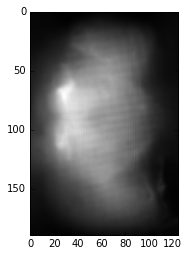

In [18]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [19]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [20]:
algorithm = linear_model.LinearRegression()

In [21]:
Sxk=Xk.shape

In [22]:
Sxk

(10608, 8)

In [23]:
X=np.zeros((Sxk[0], Sxk[1]))

In [24]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
#X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
#X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
#X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
#X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

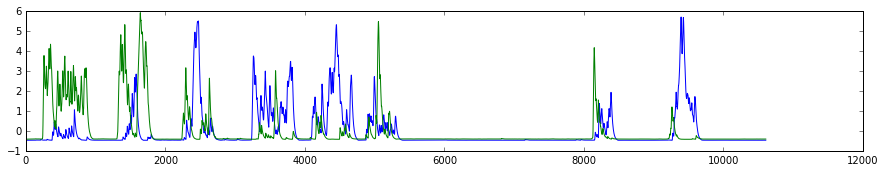

In [25]:
plt.plot(X[:,0])
plt.plot(X[:,1])
#plt.plot(X[:,2])
#plt.plot(X[:,3])
#plt.plot(X[:,4])
#plt.plot(X[:,5])

# Plot all components for turning left, right, walking, and grooming

In [26]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((Sxk[1],S[3]))

In [27]:
Sxk

(10608, 8)

In [28]:
DT.shape

(10608, 169)

In [29]:
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

In [30]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))

In [31]:
Sx=X.shape

In [32]:
for k in range(3):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
    

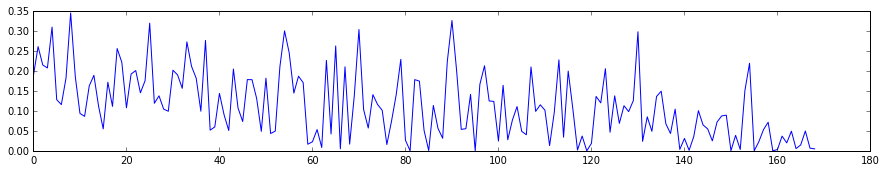

In [33]:
plt.plot(RsqUni[0,:])

In [34]:
import random

In [35]:
del Final_map
del Fmaps

NameError: name 'Final_map' is not defined

In [36]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [37]:
C=np.zeros((S[3],3))
i=0
l=0
Betas2=Betas
for j in range(S[3]):  
    if Betas2[0,j]>0.7*np.max(Betas2[0,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,2]=1
        C[j,1]=random.uniform(0,1)
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            print(M)
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        #if l==2:
            #break
    

11.1906328189
11.1906328189
11.1906328189
13.562785995
13.562785995
13.562785995


In [38]:
C=np.zeros((S[3],3))
i=0
l=0
Betas2=Betas
for j in range(S[3]):  
    if Betas2[1,j]>0.7*np.max(Betas2[1,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=random.uniform(0,1)
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[1,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        #if l==2:
         #   break

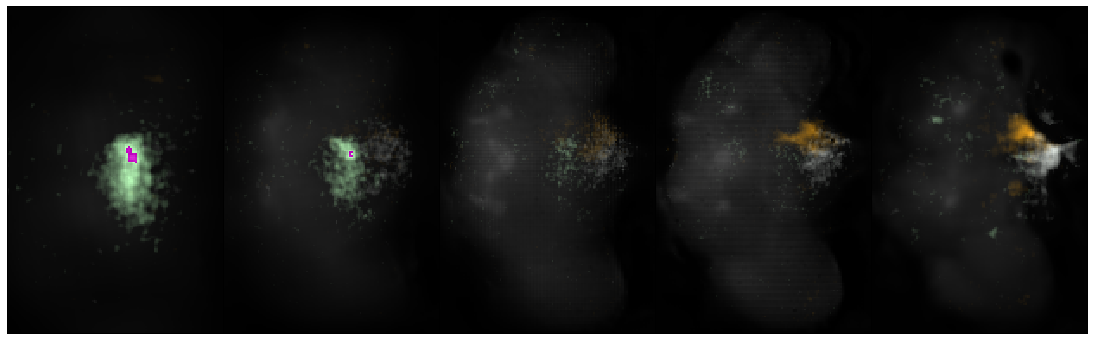

In [39]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/30
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)